Predicting medal counts for countries using historical Olympic data with machine learning.

In [70]:
import pandas as pd

In [104]:
#ler dataset
df_times = pd.read_csv('times.csv')
df_times

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [105]:
df_times = df_times[["team","country","year","athletes","age","prev_medals", "medals"]]

In [106]:
#Renomear colunas
df_times.columns = ["time", "pais", "ano", "atletas", "idade", "medalhas_anteriores", "medalhas"]

In [107]:
#Removendo colunas time e pais
df_times_numerico = df_times.drop(columns=["time","pais"], errors="ignore")
df_times_numerico


,ano,atletas,idade,medalhas_anteriores,medalhas
0,1964,8,22.0,0.0,0
1,1968,5,23.2,0.0,0
2,1972,8,29.0,0.0,0
3,1980,11,23.6,0.0,0
4,2004,5,18.6,0.0,0
...,...,...,...,...,...
2139,2000,26,25.0,0.0,0
2140,2004,14,25.1,0.0,3
2141,2008,16,26.1,3.0,4
2142,2012,9,27.3,4.0,0


In [108]:
#gerar matriz de correlação
df_times_numerico.corr()["medalhas"]

,medalhas
ano,-0.021603
atletas,0.840817
idade,0.025096
medalhas_anteriores,0.920048
medalhas,1.000000


In [109]:
import seaborn as sns

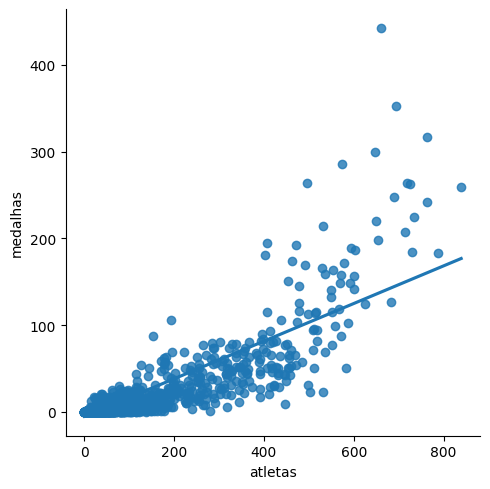

In [110]:
sns.lmplot(x="atletas", y="medalhas", data=df_times, fit_reg=True, ci=None)

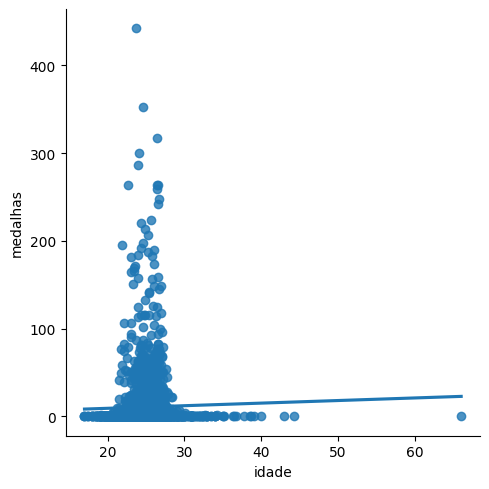

In [111]:
sns.lmplot(x="idade", y="medalhas", data=df_times, fit_reg=True, ci=None)


<Axes: ylabel='Frequency'>

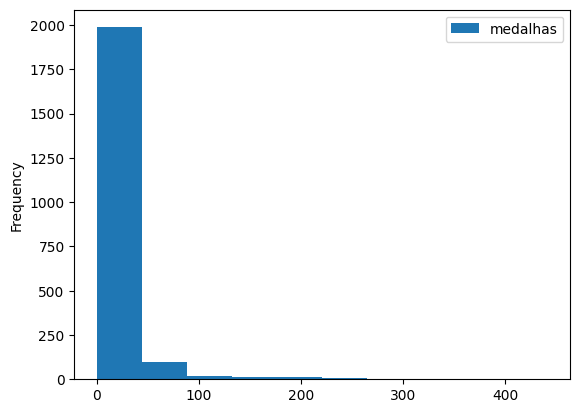

In [112]:
df_times.plot.hist(y="medalhas")

In [113]:
#verifica se há valores Nan
df_times[df_times.isnull().any(axis=1)]

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [114]:
# Retira os valores nulos
df_times = df_times.dropna()

In [115]:
# TRANSFORMAÇÃO LOGARÍTMICA DA VARIÁVEL TARGET (inserida aqui)
df_times["medalhas_log"] = np.log1p(df_times["medalhas"])

<ipython-input-115-f1c33843990f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times["medalhas_log"] = np.log1p(df_times["medalhas"])


In [116]:
#gerar matriz de correlação
df_times_numerico.corr()["medalhas"]

,medalhas
ano,-0.021603
atletas,0.840817
idade,0.025096
medalhas_anteriores,0.920048
medalhas,1.000000


In [117]:
import seaborn as sns

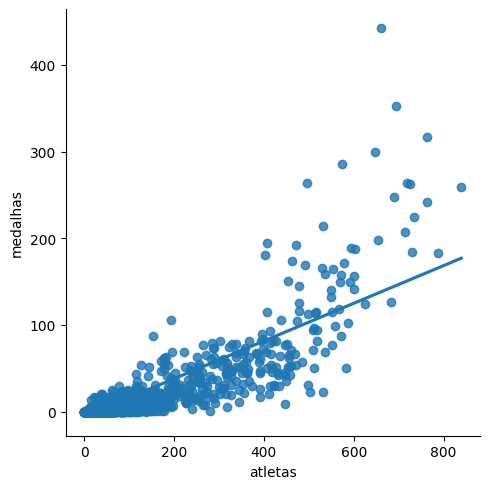

In [118]:
sns.lmplot(x="atletas", y="medalhas", data=df_times, fit_reg=True, ci=None)

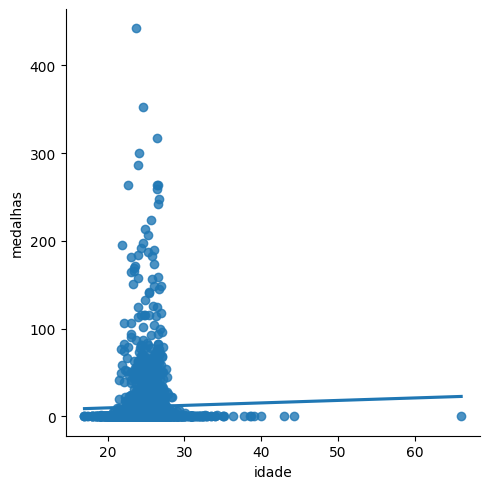

In [119]:
sns.lmplot(x="idade", y="medalhas", data=df_times, fit_reg=True, ci=None)


<Axes: ylabel='Frequency'>

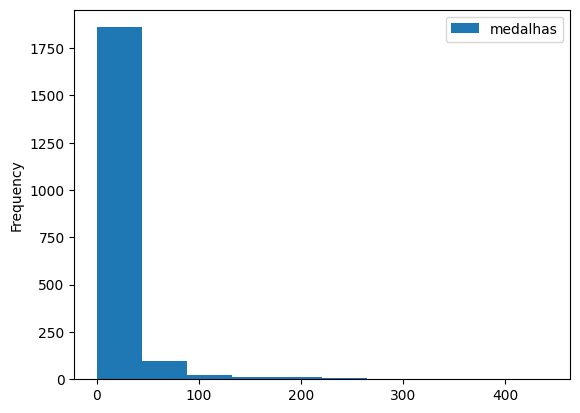

In [120]:
df_times.plot.hist(y="medalhas")

In [122]:
#verifica se há valores Nan
df_times[df_times.isnull().any(axis=1)]

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log


In [125]:
# Retira os valores nulos
df_times = df_times.dropna()

In [126]:
df_times

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log
0,AFG,Afghanistan,1964,8,22.0,0.0,0,0.000000
1,AFG,Afghanistan,1968,5,23.2,0.0,0,0.000000
2,AFG,Afghanistan,1972,8,29.0,0.0,0,0.000000
3,AFG,Afghanistan,1980,11,23.6,0.0,0,0.000000
4,AFG,Afghanistan,2004,5,18.6,0.0,0,0.000000
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0,0.000000
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3,1.386294
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4,1.609438
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,0.000000


In [127]:
# Faz o split para treinar o modelo
train = df_times[df_times["ano"] < 2012].copy()
test = df_times[df_times["ano"] >= 2012].copy()

In [128]:
train.shape

(1609, 8)

In [129]:
test.shape

(405, 8)

In [130]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [131]:
predictors = ["atletas", "medalhas_anteriores"] # define os preditores
target = "medalhas" # Define o eixo Y

In [132]:
# Treina o modelo de regressão usando as variáveis em 'predictors' para prever 'target'
reg.fit(train[predictors], train[target])

LinearRegression()

In [133]:
# Gera previsões para o conjunto de teste utilizando:
# - Modelo treinado (reg)
# - Variáveis preditoras do conjunto de teste (test[predictors])
predictions = reg.predict(test[predictors])

In [134]:
# Armazena as previsões do modelo no conjunto de teste
# Permitindo análise comparativa com a variável target real
test["predictions"] = predictions

In [135]:
test

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.693147,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,0.693147,2.155629
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,0.000000,1.505767


In [136]:
# Corrige previsões negativas substituindo-as por zero
test.loc[
    test["predictions"] < 0, "predictions"
] = 0

In [137]:
# Arredonda as previsões para números inteiros
test["predictions"] = test["predictions"].round()

In [138]:
test

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.693147,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,0.693147,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,0.000000,2.0


In [139]:
from sklearn.metrics import mean_absolute_error

# calcula o mean absolute error
error = mean_absolute_error(test["medalhas"], test["predictions"])

In [146]:
error

3.2987654320987656

In [141]:
df_times.describe()["medalhas"]

,medalhas
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


In [144]:
test[test["time"] =="USA"]

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log,predictions
2053,USA,United States,2012,689,26.7,317.0,248,5.517453,285.0
2054,USA,United States,2016,719,26.4,248.0,264,5.579730,236.0


In [145]:
test[test["time"]=="IND"]

,time,pais,ano,atletas,idade,medalhas_anteriores,medalhas,medalhas_log,predictions
907,IND,India,2012,95,26.0,3.0,6,1.945910,7.0
908,IND,India,2016,130,26.1,6.0,2,1.098612,12.0


In [ ]:
errors = (test["medals"] - test["predictions"]).abs()

In [ ]:
errors

,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


In [ ]:
error_by_team = errors.groupby(test["team"]).mean()

In [ ]:
error_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


In [ ]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [ ]:
error_ratio = error_by_team / medals_by_team

In [ ]:
error_ratio

,0
team,
AFG,1.0
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
USA,0.126953
UZB,0.625000
VEN,1.750000


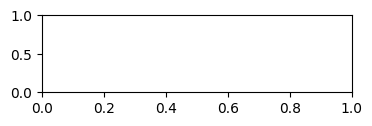

In [ ]:
error_ratio[~pd.isnull(error_ratio)]

In [ ]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
UKR,0.951220
USA,0.126953
UZB,0.625000


<Axes: ylabel='Frequency'>

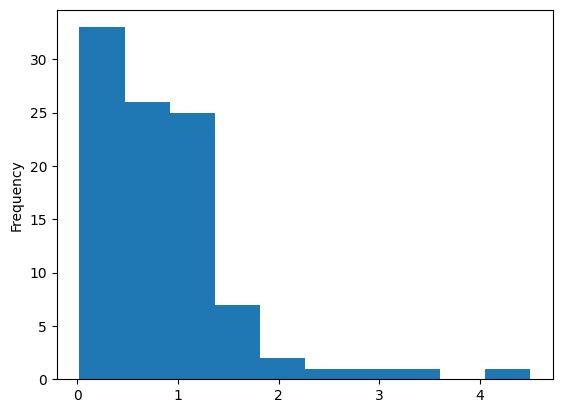

In [ ]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
MAR,2.000000
EGY,2.400000
HKG,3.000000


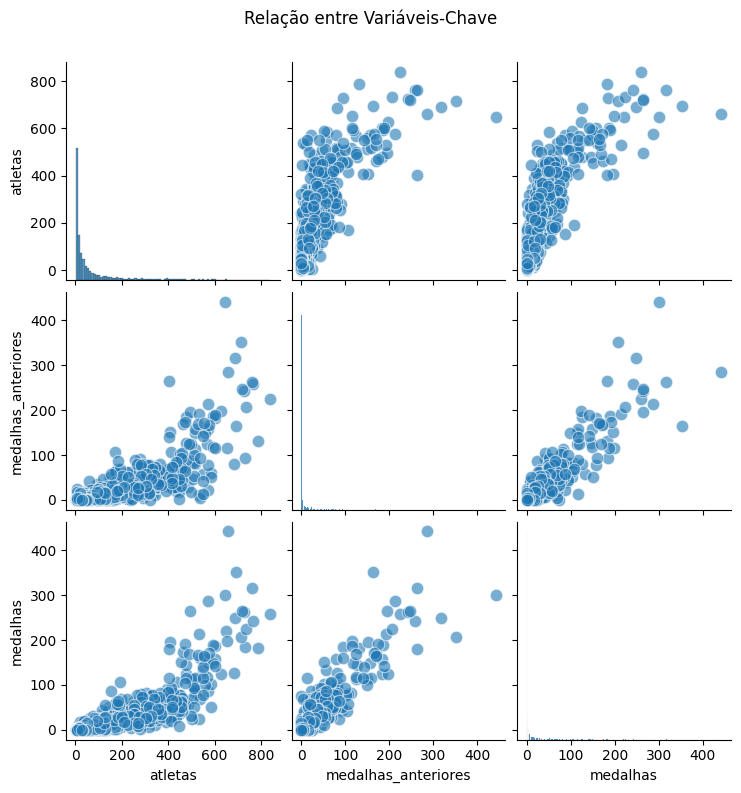

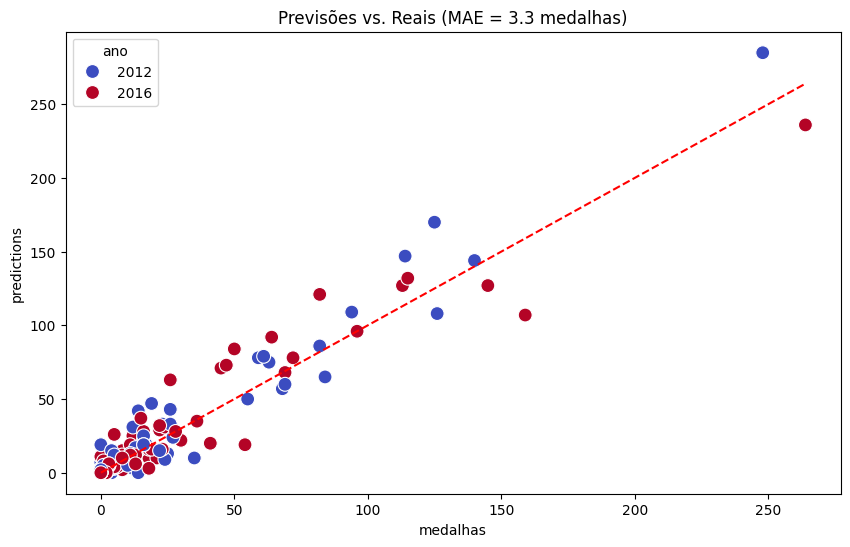

<ipython-input-153-05b37d303908>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


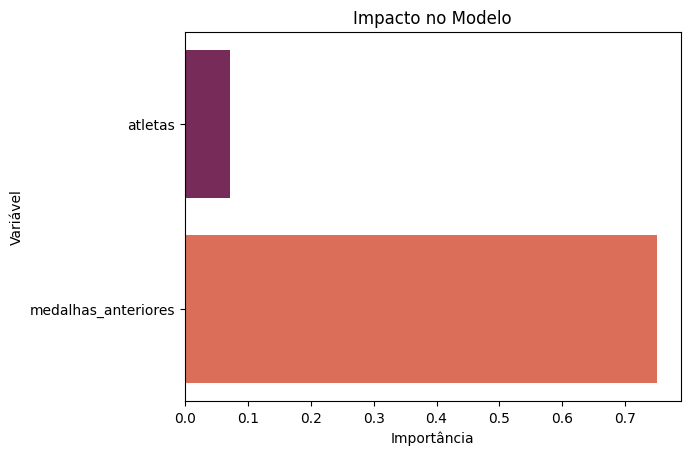

In [153]:
# Visualizações-chave / importância das variáveis

import matplotlib.pyplot as plt

# 1. Relação entre variáveis
g = sns.pairplot(
    data=df_times_numerico[['atletas', 'medalhas_anteriores', 'medalhas']],
    plot_kws={'alpha': 0.6, 's': 80}
)
g.fig.suptitle("Relação entre Variáveis-Chave", y=1.05)
plt.show()

# 2. Desempenho do modelo
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x='medalhas',
    y='predictions',
    data=test,
    hue='ano',
    palette='coolwarm',
    s=100
)
ax.plot([0, test['medalhas'].max()], [0, test['medalhas'].max()], '--r')
plt.title(f"Previsões vs. Reais (MAE = {error:.1f} medalhas)")
plt.show()

# 3. Importância das variáveis
sns.barplot(
    x='Importância',
    y='Variável',
    data=pd.DataFrame({
        'Variável': predictors,
        'Importância': abs(reg.coef_)
    }).sort_values('Importância'),
    palette='rocket'
)
plt.title("Impacto no Modelo")
plt.show()